# The best place to live in New York City
##   - with 311 Service Requests dataset

<img src='311.jpg'>

<img src="opening.jpg">

## 1. Motivation
#### What is your dataset?
Our dataset is '311 Service Requests' from NYC OpenData, it is a dataset which contains all the complaints from anybody who call 311 or use their app. The types of complaints can be almost anything; dead animals, illegal parking, noise, and even complaints about plumbing or missing paint in a rented apartment. 
#### Why did you choose this/these particular dataset(s)?
We choose the '311 Service Requests' because it is a very divers dataset with many different problems which we can analyze and compare.
#### What was your goal for the end user's experience?
Our goal was to inform users about the different areas to avoid if you don't want to live in an area where a certain problem is dominant. 



---

## 2. Basic stats. Let's understand the dataset better
#### Write about your choices in data cleaning and preprocessing
Avaliable online is the complete dataset which consists of **15,1 million rows** of data, each with **53 columns**, which is way too much data for this analysis, so we removed the columns that we didnt need and that got us down to **8 columns** we then decided to stick with just one year (2016) instead of the full time frame from 2011 until today. Further more we removed the cases which wasn't closed, the combined effort decreased our amount of rows to **2.022.409**.     
#### Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)
##### Year 2016
* Size in Mb
    * 236Mb
* Rows
    * 2.026.412
* Columns
    * 8

---

## 3. Theory. Which theoretical tools did you use?
#### Describe which machine learning tools you use and why the tools you've chosen are right for the problem you're solving.
We chose to use multiple regression, KNN, and clustering. Since the Multiple regression would be suitable to deal with many different types of complaints in certain area.
#### Talk about your model selection. How did you split the data in to test/training. Did you use cross validation?
#### Explain the model performance. How did you measure it? Are your results what you expected?

---

## 4. Visualizations
#### Explain the visualizations you've chosen.
#### Why are they right for the story you want to tell?

---

## 5. Discussion. Think critically about your creation
#### What went well?,
#### What is still missing? What could be improved?, Why?

---

# Code

## Setup

In [16]:
#Imports
import pandas as pd
import numpy as np
import csv
from csv import DictReader
import geoplotlib
from geoplotlib.utils import BoundingBox
from sklearn.cluster import KMeans
from datetime import date
import time
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
# Vissualisation of the dataset from 2016
data2016 = pd.read_csv('311_Service_Requests_from_2016.csv')
data2016

,Created Date,Complaint Type,Descriptor,Incident Zip,City,Status,Borough,Latitude,Longitude
0,01/03/2016 08:10:00 PM,Sanitation Condition,12 Dead Animals,10469.0,BRONX,Closed,BRONX,40.866258,-73.838168
1,01/04/2016 10:56:07 AM,Taxi Complaint,Insurance Information Requested,10016.0,NEW YORK,Closed,MANHATTAN,40.750218,-73.979056
2,01/02/2016 02:17:00 PM,Sanitation Condition,12 Dead Animals,10009.0,NEW YORK,Closed,MANHATTAN,40.728106,-73.978998
3,01/02/2016 04:18:00 PM,Dirty Conditions,E15 Illegal Postering,11356.0,College Point,Closed,QUEENS,40.780150,-73.846025
4,01/01/2016 01:27:36 AM,Blocked Driveway,No Access,10040.0,NEW YORK,Closed,MANHATTAN,40.862618,-73.926541
5,01/01/2016 01:53:26 AM,Illegal Parking,Blocked Hydrant,11219.0,BROOKLYN,Closed,BROOKLYN,40.637759,-74.001185
6,01/01/2016 12:54:40 AM,Illegal Parking,Blocked Hydrant,11214.0,BROOKLYN,Closed,BROOKLYN,40.600597,-74.004818
7,01/01/2016 01:59:26 AM,Illegal Parking,Blocked Hydrant,11212.0,BROOKLYN,Closed,BROOKLYN,40.662519,-73.916702
8,01/01/2016 01:01:59 AM,Illegal Parking,Double Parked Blocking Vehicle,10026.0,NEW YORK,Closed,MANHATTAN,40.803857,-73.954011
9,01/01/2016 01:55:06 AM,Derelict Vehicle,With License Plate,11234.0,BROOKLYN,Closed,BROOKLYN,40.621374,-73.926983


## Preprocessing

We preprocessed the data before we downloaded it, to save time and space on our computers because the full dataset use 9Gb while the modified 2016 version we use only takes up 236Mb

---

## Multiple regression

In [92]:
X0 = np.asarray(range(0,24) * 366)
X1 = np.zeros((366, 24))
X = np.zeros((366, 24))
janfir = date(2016,01,01)
complaintName = 'HEAT/HOT WATER'

with open('311_Service_Requests_from_2016.csv', 'rb') as fin:
    for line in DictReader(fin):
        complaintDate = (line['Created Date'].split(' ')[0])
        complaintDate = date(int(complaintDate[6:]),int(complaintDate[:2]),int(complaintDate[3:5]))
        complaintTime = (line['Created Date'].split(' ',1)[1])
        complaintTime = time.strptime(complaintTime, "%I:%M:%S %p")

        if line['Complaint Type'] == complaintName:
            try:
                X[ abs(complaintDate - janfir).days ][complaintTime.tm_hour] += 1
            except:
                pass
        try:
            X1[ abs(complaintDate - janfir).days ][complaintTime.tm_hour] += 1
        except:
            pass

In [93]:
X1 = X1 - np.mean(X1, axis=0)
X1 = X1 - X1.min()
X1 = X1 / X1.max()
X0 = X0 - X0.min()
X0 = X0 / float(X0.max())

mlreg = linear_model.LinearRegression()
mlreg.fit(np.concatenate((X0.reshape(24*366, 1), np.concatenate(X1).reshape(24*366, 1)), axis = 1), np.concatenate(X))
print 'beta1: {0}, beta2: {2}, alpha: {1}'.format(mlreg.coef_[0], mlreg.intercept_, mlreg.coef_[1])

beta1: 18.5243442623, beta2: 176.091161529, alpha: -45.6888072245


In [94]:
theCM = plt.cm.coolwarm
theCM._init()
alphas = np.abs(np.linspace(-1.0, 1.0, theCM.N))
theCM._lut[:-3,-1] = alphas

1.0


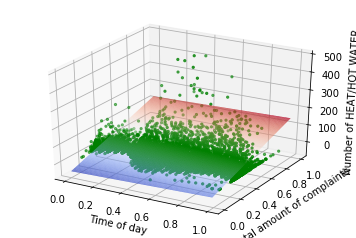

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

print max(xs)

ys = np.concatenate(X1).tolist()
zs = np.concatenate(X)

import csv

with open('docs/dataset/XYZ.csv', 'w') as csvfile:
    fieldnames = ['X', 'Y', 'Z']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, lineterminator= '\n')
    writer.writeheader()
    for each in range(len(xs)):
        writer.writerow({'X': xs[each], 'Y': ys[each], 'Z':zs[each]})

ax.scatter(xs, ys, zs, c='g', marker='.')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total amount of complaints')
ax.set_zlabel('Number of ' + complaintName) 

xx, yy = np.meshgrid(np.arange(0, 1, (1 )/100.0), np.arange(0, 1, (1)/100.0))
conc = np.c_[xx.ravel(), yy.ravel()]

xs = conc[:,0]
ys = conc[:,1]

zs = mlreg.predict(np.concatenate((xs.reshape(10000,1),ys.reshape(10000,1)), axis=1))
ax.plot_trisurf(xs, ys, zs, cmap = theCM, linewidth=0, antialiased=True)
plt.show()

---

## K Nearest Neighbors (KNN)

---

## Clustering

In [23]:
complaintName = 'Sewer'

In [24]:
points = {'lat':[], 'lon':[]}

with open('311_Service_Requests_from_2016.csv', 'rb') as fin:
    for line in DictReader(fin):
        if line['Complaint Type'] == complaintName:
            points['lat'].append(float(line['Latitude']))
            points['lon'].append(float(line['Longitude']))       

In [25]:
# Display a boundingBox plot, with all points plottet
bbox = geoplotlib.utils.BoundingBox(north=max(points['lat']), south=min(points['lat']), east=max(points['lon']), west=min(points['lon']))
geoplotlib.set_bbox(bbox)
geoplotlib.dot(points, point_size=5)
geoplotlib.inline()

In [26]:
X = []

for i in range(len(points['lat'])):
    X += [[points['lat'][i], points['lon'][i]]]

X = np.asarray(X)

In [27]:
kmeans = [KMeans(n_clusters=i, random_state=0).fit(X) for i in range(2,7)]

In [28]:
with open('docs/dataset/'+complaintName+'_Clustering.csv', 'wb') as fout:
    fieldnames = ['lat', 'lon', '2', '3', '4', '5', '6']
    writer = csv.DictWriter(fout, fieldnames=fieldnames)

    writer.writeheader()
    
    for i in range(len(points['lat'])):
        line = {}
        line['lat'] = points['lat'][i] 
        line['lon'] = points['lon'][i]
        for j in range(2,7):
            line[str(j)] = kmeans[j - 2].labels_[i]
        writer.writerow(line)
        
    for i in range(2,7):
        line = {}
        for j in range(i):
            line['lat'] = kmeans[i - 2].cluster_centers_[j][0]
            line['lon'] = kmeans[i - 2].cluster_centers_[j][1]
            line[str(i)] = 10 + j
            writer.writerow(line)

---